In [5]:
import tensorflow as tf
import os

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data_dir='pic2'

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [6]:
img=cv2.imread(os.path.join('pic','fc','debris.png'))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'resize' is not defined

In [7]:
for img_cls in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_cls)):
        img_path=os.path.join(data_dir,img_cls,image)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('image not here')
                os.remove(img_path)
        except Exception as e:
            print('issue with {}'.format(img_path))

In [8]:
data=tf.keras.utils.image_dataset_from_directory('pic2')

Found 8863 files belonging to 2 classes.


In [9]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [10]:
batch[0].shape

(32, 256, 256, 3)

In [11]:
batch[1]

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

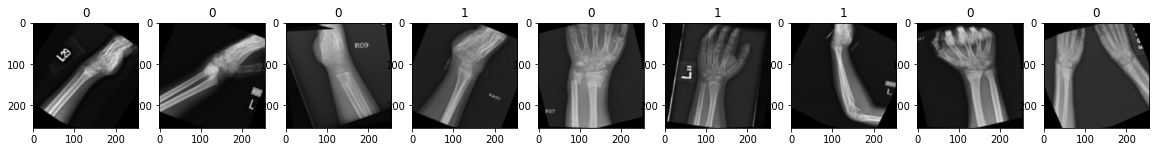

In [12]:
fig,ax=plt.subplots(ncols=9,figsize=(20,20))
for idx,img in enumerate(batch[0][:9]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data=data.map(lambda x,y:(x/255,y))#normalisation
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [14]:
len(data)

277

In [15]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [16]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [18]:
model=Sequential()#try functional

#layer 1 - input layer.....16 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D()) #max value after relu activation
 
#layer 2 - 32 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D()) #max value after relu activation

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #gives the final output

In [19]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [20]:
logdir='div'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
138/138 [==============================] - 74s 524ms/step - loss: 0.6042 - accuracy: 0.6621 - val_loss: 0.4889 - val_accuracy: 0.7785
Epoch 2/20
138/138 [==============================] - 72s 519ms/step - loss: 0.3693 - accuracy: 0.8356 - val_loss: 0.2557 - val_accuracy: 0.8968
Epoch 3/20
138/138 [==============================] - 78s 565ms/step - loss: 0.1330 - accuracy: 0.9500 - val_loss: 0.1296 - val_accuracy: 0.9498
Epoch 4/20
138/138 [==============================] - 77s 558ms/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 0.2015 - val_accuracy: 0.9408
Epoch 5/20
138/138 [==============================] - 76s 551ms/step - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.1451 - val_accuracy: 0.9570
Epoch 6/20
138/138 [==============================] - 76s 552ms/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.0838 - val_accuracy: 0.9771
Epoch 7/20
138/138 [==============================] - 78s 561ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.1398 - val_ac

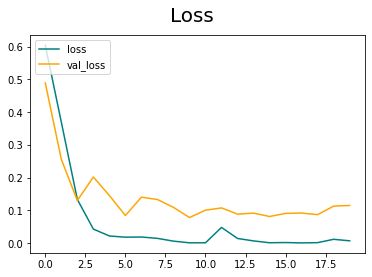

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

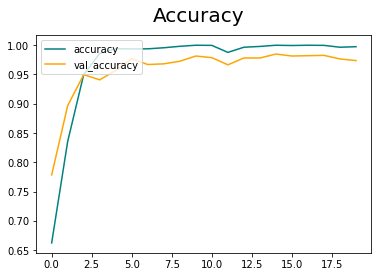

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
#saving the model -

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
  


In [1]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy#confusion metrics

In [26]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 112ms/step


In [28]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9776286482810974,Recall:0.9583333134651184,Accuracy:0.9676339030265808


In [30]:
img=cv2.imread('absek2.png')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
    print('No Fracture')
else:
    print('Fracture')

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [7]:
from joblib import Parallel, delayed
import joblib

In [32]:
joblib.dump(model, 'fracture.pkl')

['fracture.pkl']

In [8]:
knn_from_joblib = joblib.load('fracture.pkl')


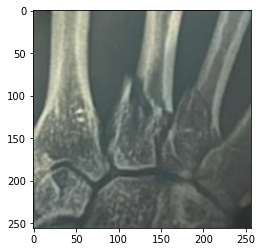

1/1 [==============================] - 0s 41ms/step
[[0.00749829]]
Fracture


In [10]:
img=cv2.imread('absek2.png')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=knn_from_joblib.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
    print('No Fracture')
else:
    print('Fracture')
